# Python Intermedio - Sesión 4

![logo](https://www.belatrix.com/wp-content/uploads/2023/08/belatrix-logosweb-1.png)

> Módulo II – Aplicaciones de Python

1. Manejo de Archivos de Texto
2. Generación de Reportes de Texto y Formatos Avanzados
3. Manejo de archivos de CSV y Excel
4. Reportes Estadísticos Fundamentales

Repaso...

In [14]:
productos = [
    {
      "nombre": "Coca Cola",
      "precio": 23.5
    },
    {
      "nombre": "Gansito",
      "precio": 21.5
    },
]

print("=" * 30)
for producto in productos:
  print(f"{producto['nombre']:20} ${producto['precio']:8.2f}")
print("=" * 30)

Coca Cola            $   23.50
Gansito              $   21.50


## Formatos de Texto Simples

En este tipo de formatos, lo principal será poner los datos de forma estructurada con la mejor complejidad posible.

Un formato muy utilizado son los valores separados por comas (*CSV*), estos permiten volcar la información dentro de reportes simples para su uso directo.

Por ejemplo, si queremos volcar una lista de precios con su iva, entonces tendríamos:

```csv
40.5,46.98
103.78,120.38
...
100,116.0
```

En cada línea del reporte se encuentran la misma cantidad de valores separados por comas, adicionalmente podríamos convenir que la primera linea sea utilizada para definir las cabeceras (etiquetas) de cada columna de datos.

Así, cada valor separado por comas haría referencia a una columna de información y cada línea dispuesta representaría los datos de un registro (todos los valores de las diferentes columnas para ese dato).

```csv
Precio,Precio más IVA
40.5,46.98
103.78,120.38
...
100,116.0
```

In [17]:
precios = [40.5, 103.78, 201.19, 309.6, 24.73, 12.55, 29.44, 100]

precios

[40.5, 103.78, 201.19, 309.6, 24.73, 12.55, 29.44, 100]

In [20]:
precios_mas_iva = [round(precio * 1.16, 2) for precio in precios]

precios_mas_iva

[46.98, 120.38, 233.38, 359.14, 28.69, 14.56, 34.15, 116.0]

Recordar... la función `zip` con la sintaxis `<lista> = zip(<lista1>, <lista2>)` genera una "lista" (secuencia) que unificada en `2-tuplas` la información de ambas listas, generando así una secuencia de tuplas.

In [22]:
list(zip(precios, precios_mas_iva))

[(40.5, 46.98),
 (103.78, 120.38),
 (201.19, 233.38),
 (309.6, 359.14),
 (24.73, 28.69),
 (12.55, 14.56),
 (29.44, 34.15),
 (100, 116.0)]

In [24]:
print("Precio,Precio con IVA")
for precio, precio_mas_iva in zip(precios, precios_mas_iva):
  print(f"{precio},{precio_mas_iva}")

Precio,Precio con IVA
40.5,46.98
103.78,120.38
201.19,233.38
309.6,359.14
24.73,28.69
12.55,14.56
29.44,34.15
100,116.0


In [27]:
reporte = "Precio,Precio con IVA\n"

for precio, precio_mas_iva in zip(precios, precios_mas_iva):
  reporte += f"{precio},{precio_mas_iva}" + "\n"

print(reporte)

Precio,Precio con IVA
40.5,46.98
103.78,120.38
201.19,233.38
309.6,359.14
24.73,28.69
12.55,14.56
29.44,34.15
100,116.0



In [28]:
archivo = open("lista_precios.csv", "w")
archivo.write(reporte)
archivo.close()

> Ejercicio - Normalizar las edades

Dada una serie de datos sobre las edades de personas, se desea calcular la edad normalizada entre el valor mínimo y el valor máximo, para tener los datos entre 0 y 1.

Así la edad máxima debería ser 1 y la mínima 0. Entre más cercana sea otra edad a la edad máxima su valor se pegará a 1, y sino lo hará a 0.

**Problema**

1. Define una lista de edades
2. Encuentra el valor mínimo y máximo (la edad mínima y máxima)
3. Genera una nueva lista a partir de las edades usando la **Ec. (1)**
4. Empaqueta con `zip` ambas listas de edades y edades normalizadas
5. Genera un reporte con formato CSV
6. Guarda el reporte en el archivo `edades_normalizadas.csv`

> **Ec. (1)** - Dada una edad, su normalización *minmax* es:
$$
edad_{normalizada} = \frac{edad - edad_{minima}}{edad_{maxima} - edad_{minima}}
$$

In [29]:
edades = [63, 45, 23, 17, 19, 21, 77, 42, 56, 85, 92, 16, 14, 29, 31, 33]

edades

[63, 45, 23, 17, 19, 21, 77, 42, 56, 85, 92, 16, 14, 29, 31, 33]

In [30]:
edad_min = min(edades)
edad_max = max(edades)

edad_min, edad_max

(14, 92)

In [32]:
edades_normalizadas = [round((edad - edad_min) / (edad_max - edad_min), 2) for edad in edades]

edades_normalizadas

[0.63,
 0.4,
 0.12,
 0.04,
 0.06,
 0.09,
 0.81,
 0.36,
 0.54,
 0.91,
 1.0,
 0.03,
 0.0,
 0.19,
 0.22,
 0.24]

In [33]:
for edad, edad_n in zip(edades, edades_normalizadas):
  print(edad, edad_n)

63 0.63
45 0.4
23 0.12
17 0.04
19 0.06
21 0.09
77 0.81
42 0.36
56 0.54
85 0.91
92 1.0
16 0.03
14 0.0
29 0.19
31 0.22
33 0.24


In [37]:
reporte = "EDAD,EDAD NORMALIZADA\n"

for edad, edad_n in zip(edades, edades_normalizadas):
  reporte += f"{edad},{edad_n}\n"

print(reporte)

EDAD,EDAD NORMALIZADA
63,0.63
45,0.4
23,0.12
17,0.04
19,0.06
21,0.09
77,0.81
42,0.36
56,0.54
85,0.91
92,1.0
16,0.03
14,0.0
29,0.19
31,0.22
33,0.24



In [40]:
with open("edades_normalizadas.csv", "w") as archivo:
  archivo.write(reporte)

## Librería Pandas

La librería Pandas es una paquetería de python que contiene herramientas de manipulación y análisis de datos.

Su documentación se encuentra disponible en:

https://pandas.pydata.org


Pandas provee dos formas de manipular los datos:

* **Serie de Datos** - `pandas.Series` representa una serie de datos (múltiples valores indexados del mismo tipo), por ejemplo, para manipular o analizar edades, precios, nombres, acciones, totales.
* **Tabla de Datos** - `pandas.DataFrame` representa una tabla de datos (múltiples series de datos organizadas como columnas dentro de una matriz de datos o tablero de información), por ejemplo, para manipular conjuntos de datos como estudios sociales, carteras de clientes, resultados de experimentos.

In [42]:
# ! pip install pandas
import pandas

> Ejemplo de una serie de datos

In [43]:
serie_edades = pandas.Series([23, 45, 38, 79, 84, 17, 21])

serie_edades

,0
0,23
1,45
2,38
3,79
4,84
5,17
6,21


### Algunas operaciones sobre series..

* `.count()` - El total de elementos en la serie
* `.min()` - El elemento menor dentro de la serie
* `.max()` - El elemento mayor dentro de la serie
* `.sum()` - La suma de valores dentro de la serie (si es numérica)
* `.mean()` - El promedio o media ($\mu$) de los valores dentro de la siere (si es numérica)
* `.std()` - La desviación estándar ($\sqrt{\sigma^2}$) de los valores dentro la serie
* `.var()` - La desviación estándar ($\sigma^2$) de los valores dentro la serie

In [44]:
serie_edades.count()

np.int64(7)

In [45]:
serie_edades.min()

17

In [46]:
serie_edades.max()

84

In [47]:
serie_edades.sum()

np.int64(307)

In [48]:
serie_edades.mean()

np.float64(43.857142857142854)

In [49]:
serie_edades.std()

27.570688369042532

In [50]:
serie_edades.var()

760.1428571428572

> Describir la serie

In [51]:
serie_edades.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7 entries, 0 to 6
Series name: None
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 188.0 bytes


In [52]:
serie_edades.describe()

,0
count,7.000000
mean,43.857143
std,27.570688
min,17.000000
25%,22.000000
50%,38.000000
75%,62.000000
max,84.000000


### Gráficas de series...

* `.plot()` - Gráfica de líneas o serie
* `.plot.bar()` - Gráfica de barras (verticales)
* `.plot.barh()` - Gráfica de barras horizantales
* `.plot.pie()` - Gráfica de pastel (en datos categóricos o discretos)
* `.plot.hist(density=True|False)` - Gráfica de histograma en frecuencias o densidad
* `.plot.density()` - Gráfica de densidad

<Axes: >

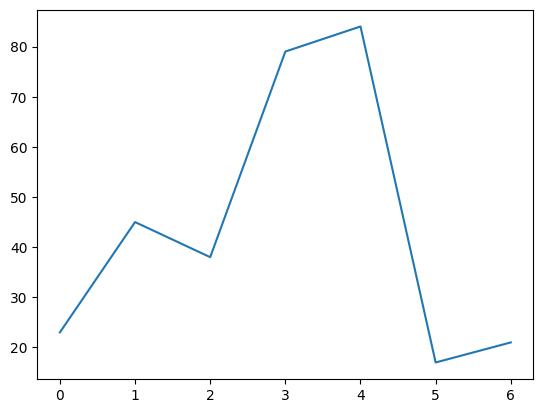

In [53]:
serie_edades.plot()

<Axes: >

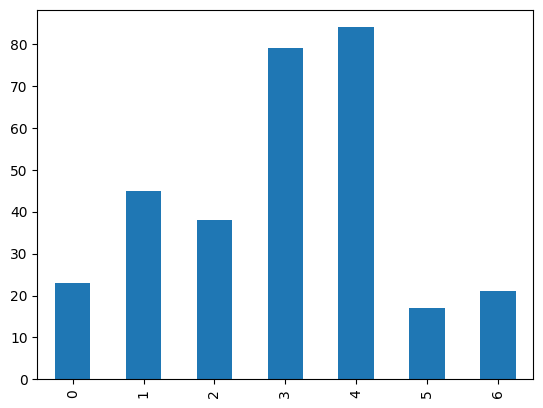

In [54]:
serie_edades.plot.bar()

<Axes: >

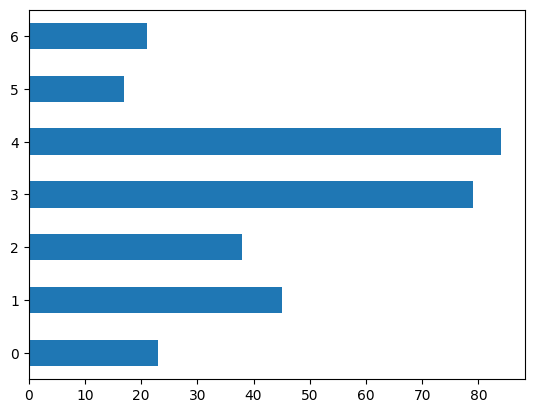

In [55]:
serie_edades.plot.barh()

<Axes: >

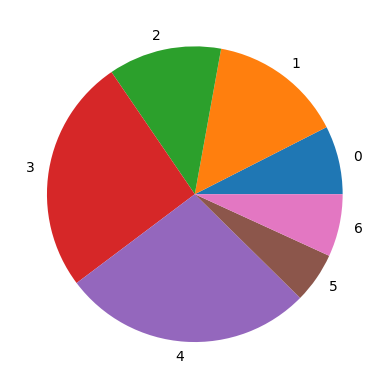

In [56]:
serie_edades.plot.pie()

<Axes: ylabel='Frequency'>

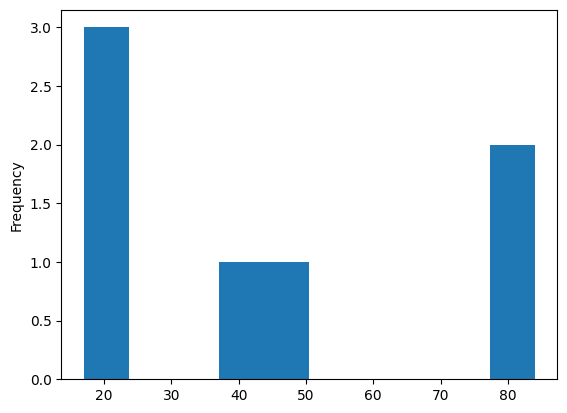

In [57]:
serie_edades.plot.hist()

<Axes: ylabel='Frequency'>

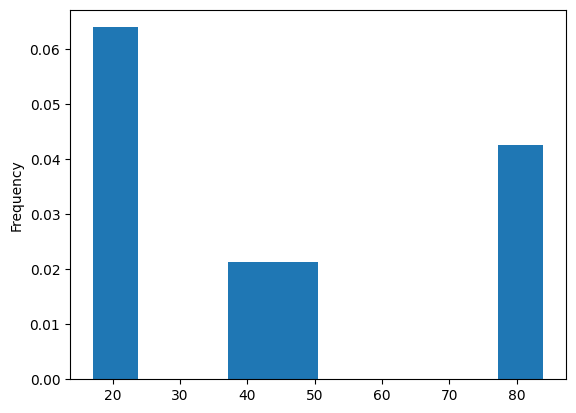

In [58]:
serie_edades.plot.hist(density=True)

<Axes: ylabel='Frequency'>

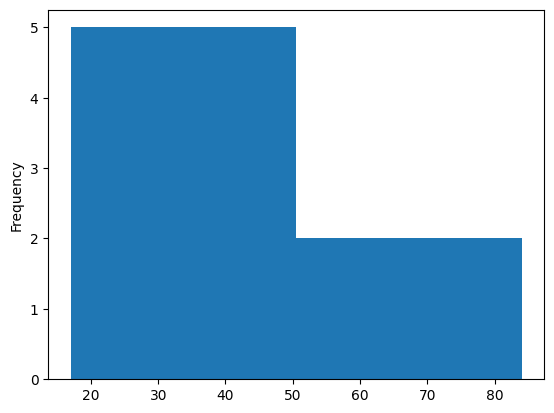

In [62]:
serie_edades.plot.hist(density=False, bins=2)

<Axes: ylabel='Density'>

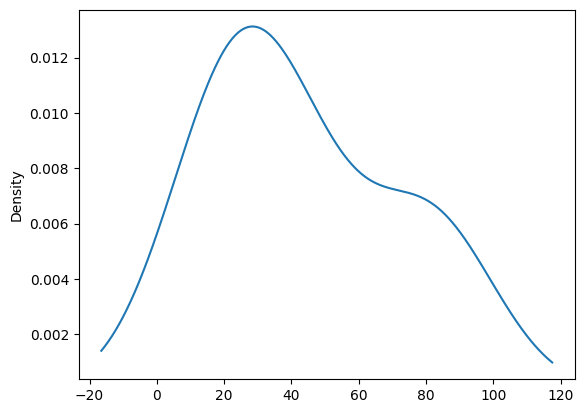

In [63]:
serie_edades.plot.density()

> Ejemplo de una tabla de datos

In [66]:
# Modelo Frame-List
tabla1 = pandas.DataFrame({
    "Edad": [18, 25, 33],
    "Género": ["Hombre", "Mujer", "Hombre"],
    "Casado": [False, True, False],
})

tabla1

,Edad,Género,Casado
0,18,Hombre,False
1,25,Mujer,True
2,33,Hombre,False


In [67]:
# Modelo List-Frames
tabla2 = pandas.DataFrame([
    {
        "Edad": 18,
        "Género": "Hombre",
        "Casado": False
    },
    {
        "Edad": 25,
        "Género": "Mujer",
        "Casado": True
    },
    {
        "Edad": 33,
        "Género": "Hombre",
        "Casado": False
    },
])

tabla2

,Edad,Género,Casado
0,18,Hombre,False
1,25,Mujer,True
2,33,Hombre,False


In [69]:
# Modelo List-Tuple
tabla3 = pandas.DataFrame([
    (18, "Hombre", False),
    (25, "Mujer", True),
    (33, "Hombre", False),
], columns=["Edad", "Género", "Casado"])

tabla3

,Edad,Género,Casado
0,18,Hombre,False
1,25,Mujer,True
2,33,Hombre,False


> Cargar los datos desde un CSV

In [72]:
# datos1 = pandas.read_csv("https://github.com/dragonnomada/belatrix-python-intermedio-julio-2025/blob/main/datos/Personas.csv?raw=True") # read_csv(<ruta>) | <ruta> local o remota

datos1 = pandas.read_csv("https://github.com/dragonnomada/belatrix-python-intermedio-julio-2025/raw/refs/heads/main/datos/Personas.csv") # read_csv(<ruta>) | <ruta> local o remota

datos1

,Edad,Género,Casado
0,18,Hombre,False
1,25,Mujer,True
2,33,Hombre,False


In [73]:
datos2 = pandas.read_csv("https://github.com/dragonnomada/belatrix-python-intermedio-julio-2025/raw/refs/heads/main/datos/diabetes.csv")

datos2

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,...,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,...,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,...,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,...,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


> Cargar los datos desde Excel

In [76]:
datos3 = pandas.read_excel("https://github.com/dragonnomada/belatrix-python-intermedio-julio-2025/raw/refs/heads/main/datos/Personas.xlsx", sheet_name="Hoja1")

datos3

,Edad,Género,Casado
0,18,Hombre,False
1,25,Mujer,True
2,33,Hombre,False


### Algunas operaciones en tablas de datos...

* `.info()` - Muestra la información general de la tabla de datos (números de registros, números de columnas, tipos de datos detectados en cada columna, valores no-nulos de cada columna, tamaño en memoria)
* `.describe()` - Muestra la información estadística de las columnas numéricas
* `.head(<n>)` - Muestra solo las primeras `<n>` filas (o 5)
* `.tail(<n>)` - Muestra solo las últimas `<n>` filas (o 5)
* `.sample(<n>)` - Muestra `<n>` filas aleatorias (para interpretación)

In [77]:
students = pandas.read_csv("https://github.com/dragonnomada/belatrix-python-intermedio-julio-2025/blob/main/datos/student_habits_performance.csv?raw=true")

students.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [78]:
students.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [79]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [80]:
students.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


> Analizar columnas (series de datos) dentro de la tabla de datos

In [81]:
edades = students["age"]

edades

,age
0,23
1,20
2,21
3,23
4,19
...,...
995,21
996,17
997,20
998,24


<Axes: >

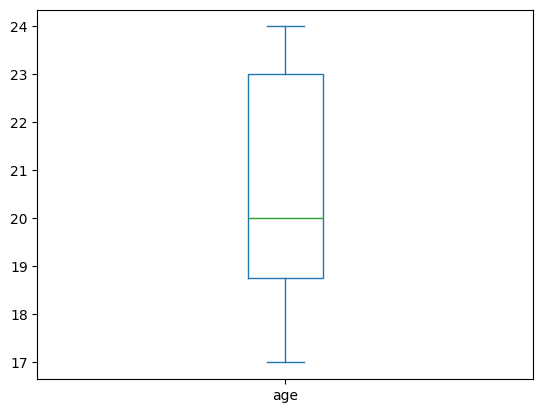

In [82]:
edades.plot.box()

<Axes: ylabel='Frequency'>

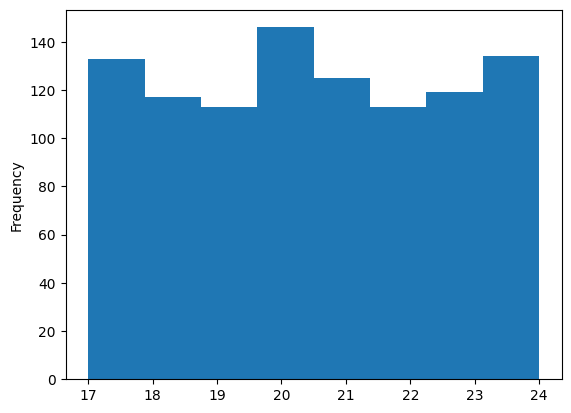

In [89]:
edades.plot.hist(bins=8)

In [87]:
edades.value_counts() # La serie de los conteos para cada valor único

,count
age,
20,146
24,134
17,133
21,125
23,119
18,117
19,113
22,113


<Axes: ylabel='age'>

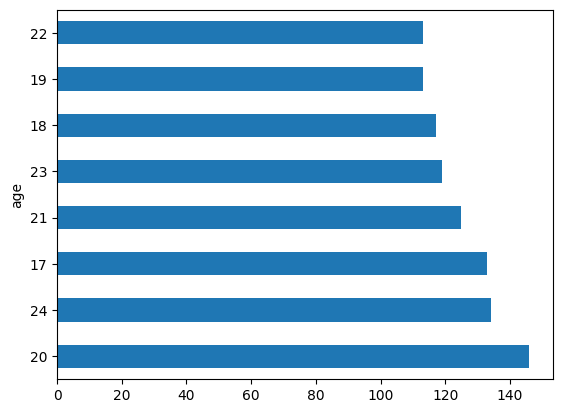

In [90]:
edades.value_counts().plot.barh()